<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Алгоритм Дерево решений**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s5e5  

**Что нужно сделать:**

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s5e5
2. Проведисти разведочный анализ данных (EDA)  
3. Построить деревья решений


**Форма загрузки на платформу:** строго файл ipynb. Перед загрузкой еще раз запустите ноутбук, убедившись, что все работает корректно без ошибок






# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [45]:
import pandas as pd

# <font color='#11a642' size='6'> **Загрузка данных**

In [46]:
!gdown 1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C

Downloading...
From: https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C
To: /Users/antontravkin/Sites/python_rtk/part 2/Lesson 19/train_сalories.csv
100%|██████████████████████████████████████| 35.5M/35.5M [00:14<00:00, 2.52MB/s]


In [47]:
try:
  df = pd.read_csv('/content/train_сalories.csv')
except:
  df = pd.read_csv('train_сalories.csv')

In [48]:
# на этих данных дальше необходимо разработать модель
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## <font color='#11a642' size='5'> Роли для независимых признаков

In [49]:
target = 'Calories'


# <font color='#11a642' size='6'> **Разведочный анализ данных**

<font color='#11a642' size='5'>
Оцените размер вашего датасета  

1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [50]:
# Сколько ГБ ваш датасет
# ваш код
#1
size_bytes = df.memory_usage(deep=True).sum()
size_gb = size_bytes / (1024**3)
#2
print(f"Размер датасета: {size_gb:.10f} ГБ")
num_rows = df.shape[0]
print("Количество строк:", num_rows)

Размер датасета: 0.0824235138 ГБ
Количество строк: 750000


<font color='#11a642' size='5'>
Рекомендуется:

- посмотреть на `df.info()`, `df.describe()`
- визуализировать распределения целевой переменной и признаков (гистограммы, boxplot)
- посмотреть на корреляции (`df.corr()`)
- проверить пропуски

1. Посмотреть df.info() и df.describe()

In [51]:
# ваш код
# Общая информация о датасете: типы данных, ненулевые значения
df.info()

# Статистическая сводка по числовым признакам
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


2. Визуализировать распределения


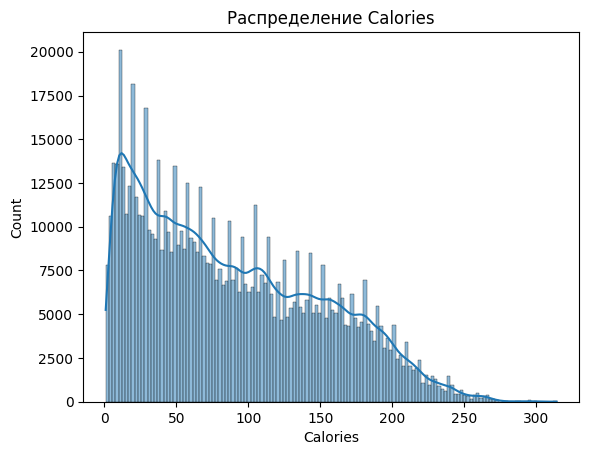

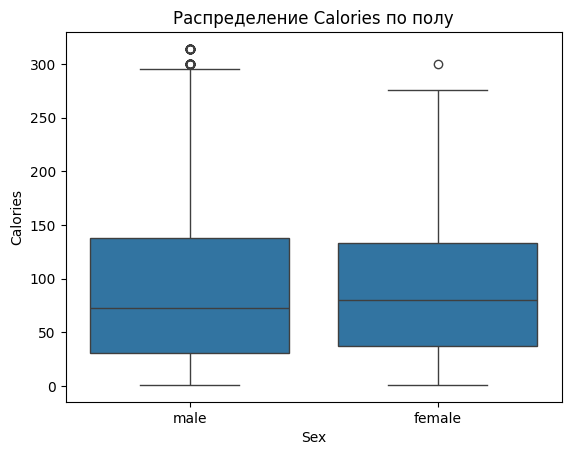

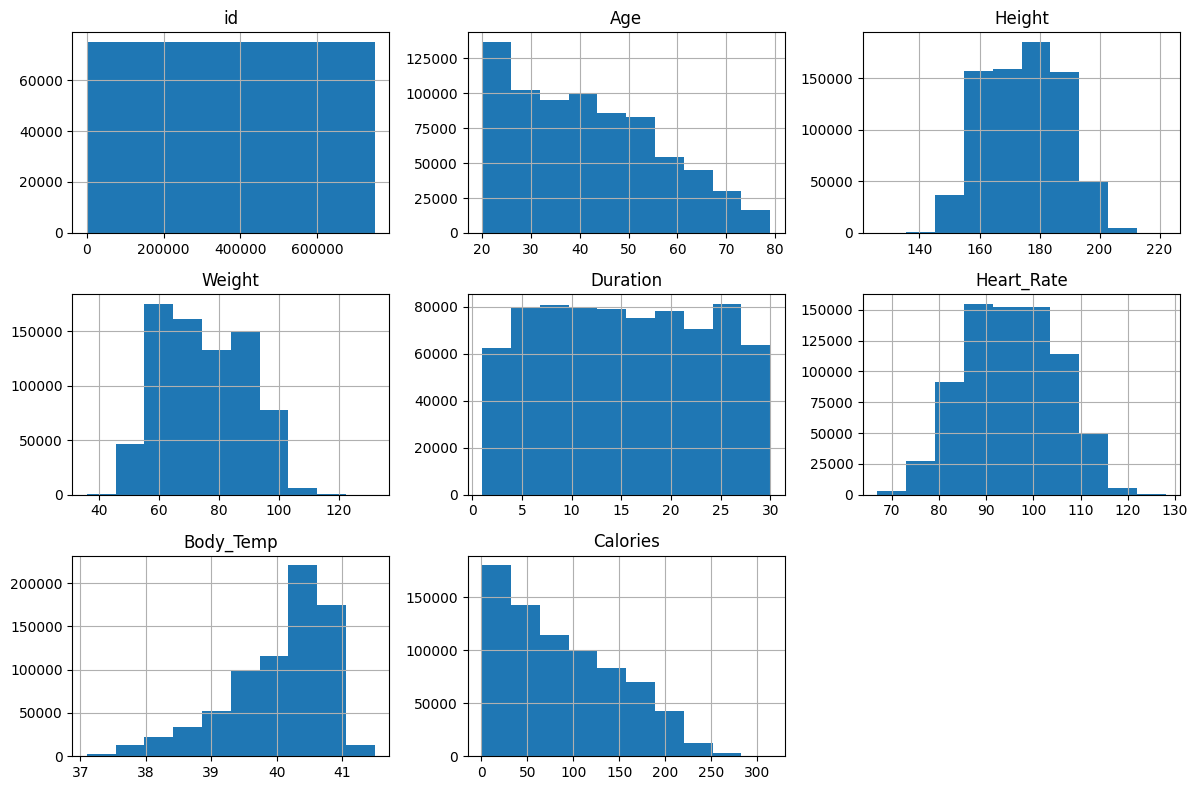

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма целевой переменной (Calories)
sns.histplot(df['Calories'], kde=True)
plt.title("Распределение Calories")
plt.show()

# Boxplot для сравнения по полу
sns.boxplot(x='Sex', y='Calories', data=df)
plt.title("Распределение Calories по полу")
plt.show()

# Гистограммы всех числовых признаков
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

3. Корреляционная матрица

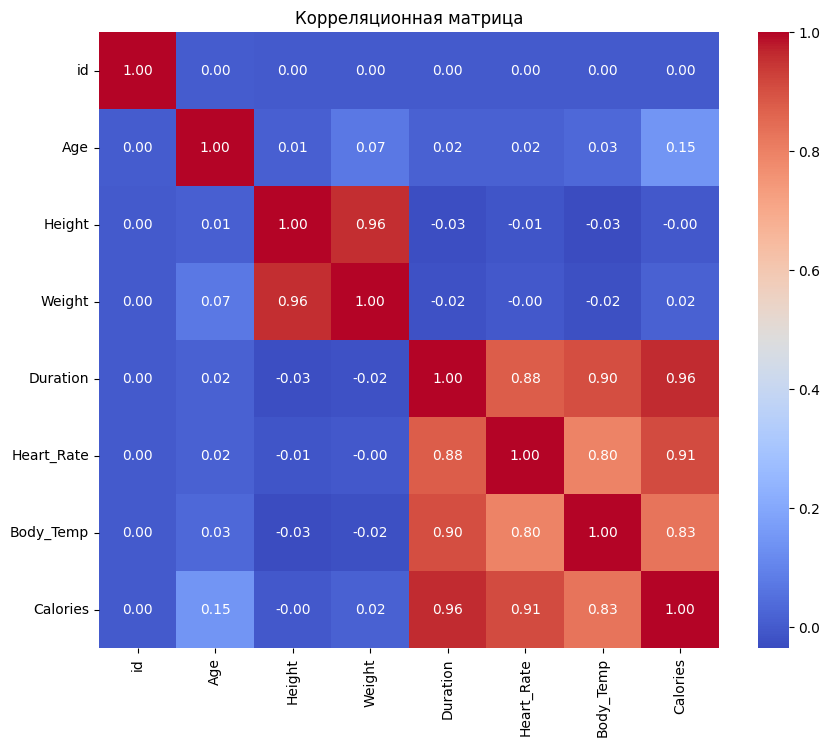

In [53]:
# Только числовые столбцы
corr = df.corr(numeric_only=True)

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

4. Проверка на пропуски

In [54]:
# Суммарное количество пропущенных значений
print(df.isnull().sum())


id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [55]:
# ваш код
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Кодирование категориального признака 'Sex'
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0

# 2. Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Calories', axis=1)
y = df['Calories']

# 3. Разделение на train и test (например, 80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Проверим размер
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (600000, 8)
Test shape: (150000, 8)


<font color='#11a642' size='5'> Ответьте на вопрос:

Для чего нужен параметр random_state? попробуйте его изменить, что-то изменилось?

# <font color='#11a642' size='6'> **Подготовка данных к обучению**


1. Обработка пропусков, если они есть
2. Обработка категориальных переменных, если они есть
3. Стоит ли делать нормализацию данных?



In [56]:
# ваш код
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    

# <font color='#11a642' size='6'> **Построение модели дерево решений**

## <font color='#11a642' size='5'> Построение максимального дерева без ограничений на гиперпараметры


In [57]:
# ваш код
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Модель дерева решений без ограничений
tree = DecisionTreeRegressor(random_state=42)

# 2. Обучение модели
tree.fit(X_train, y_train)

# 3. Предсказания
y_pred = tree.predict(X_test)

# 4. Метрики качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 MSE (среднеквадратичная ошибка):", mse)
print("📈 R² (коэффициент детерминации):", r2)

📊 MSE (среднеквадратичная ошибка): 26.8091
📈 R² (коэффициент детерминации): 0.9930826215770704


### <font color='#11a642' size='4'> Оценка качества  максимального дерева без ограничений на гиперпараметры


In [58]:
# ваш код
from sklearn.tree import DecisionTreeClassifier  # или DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Предположим, у вас есть данные X и метки y
# X, y = ...

# Разобьём данные на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Создаём максимальное дерево (без ограничений на глубину, минимальное количество листьев и т.д.)
tree = DecisionTreeClassifier(random_state=42)  # Для классификации
# tree = DecisionTreeRegressor(random_state=42)  # Для регрессии

# Обучаем модель
tree.fit(X_train, y_train)

# Предсказываем на train и test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Оцениваем качество
print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train accuracy: 1.0
Test accuracy: 0.17183555555555555


## <font color='#11a642' size='5'> Построение дерева с поиском наилучших гиперапарметров


Для поиска наилучших гиперпараметров используйте:
- `GridSearchCV` или `RandomizedSearchCV`
- Пример параметров:

```python
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
```

Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Точность на тестовой выборке: 1.000


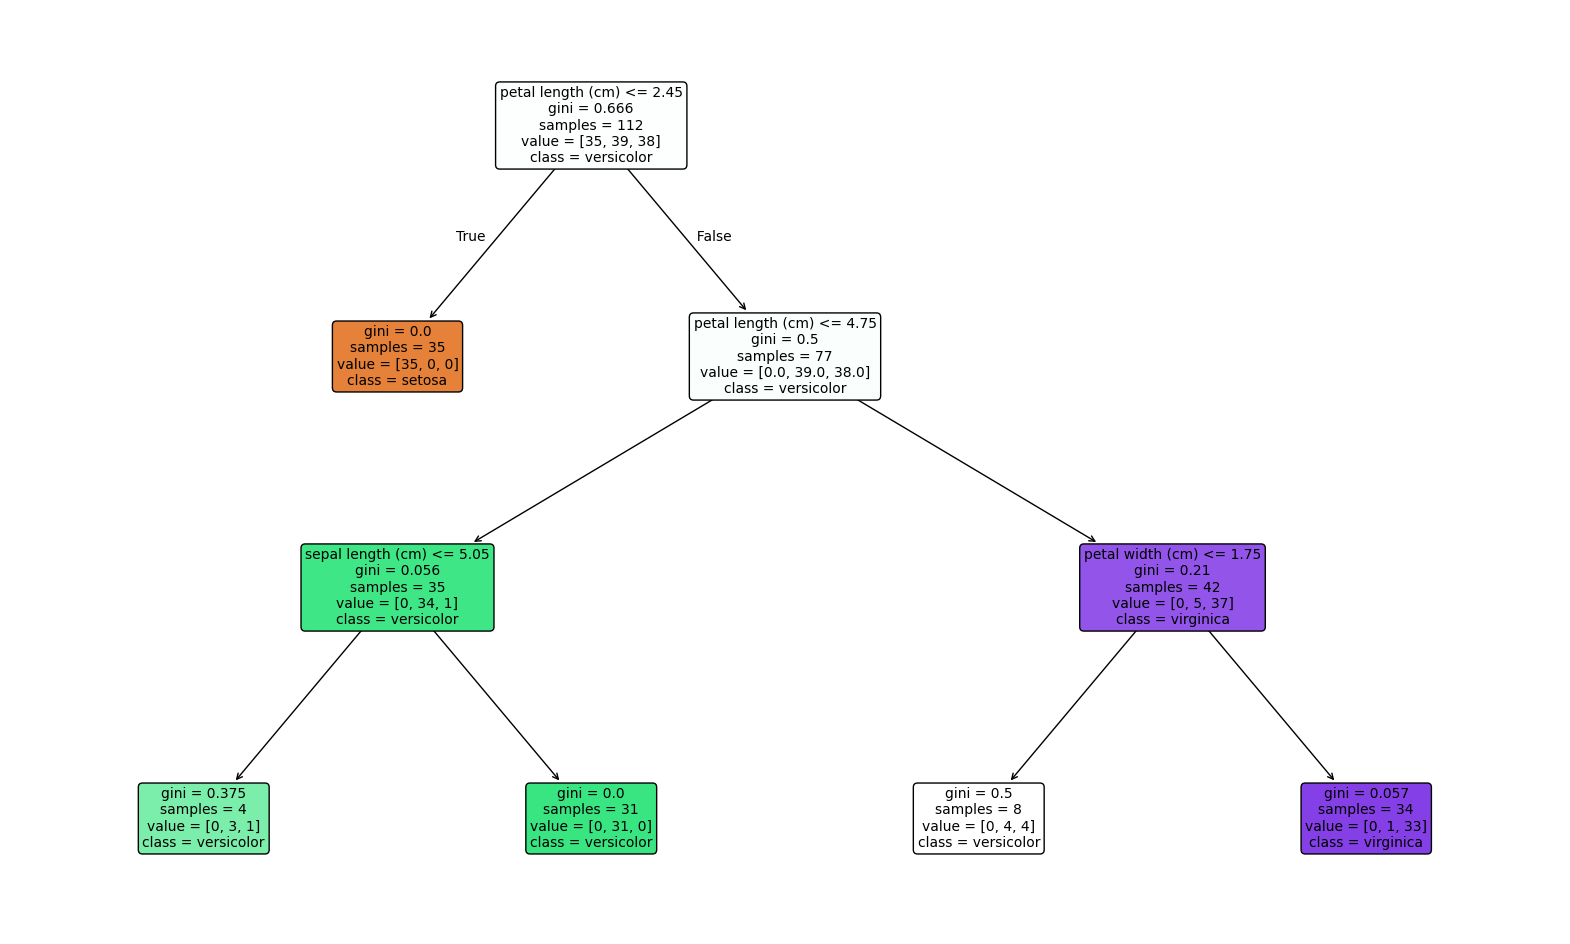

In [59]:
# ваш код
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Загружаем данные (пример на Iris)
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Делим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Создаем дерево без параметров
tree = DecisionTreeClassifier(random_state=42)

# Задаем сетку параметров для поиска
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Запускаем GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Обучаем дерево с лучшими параметрами
best_tree = grid_search.best_estimator_

# Оцениваем качество на тесте
test_score = best_tree.score(X_test, y_test)
print(f"Точность на тестовой выборке: {test_score:.3f}")

# Визуализируем дерево
plt.figure(figsize=(20, 12))
plot_tree(best_tree, feature_names=feature_names,
          class_names=data.target_names, filled=True, rounded=True, fontsize=10)
plt.show()

### <font color='#11a642' size='4'> Оценка качества  дерева с оптимальными гиперпараметрами


In [60]:
# ваш код

# Оценка точности (accuracy) на тестовой выборке
from sklearn.metrics import classification_report, confusion_matrix
test_accuracy = best_tree.score(X_test, y_test)
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

# Дополнительно можно получить предсказания и посчитать другие метрики, например:

y_pred = best_tree.predict(X_test)
print("Отчет классификации:\n", classification_report(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))

Точность на тестовой выборке: 1.000
Отчет классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Матрица ошибок:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### <font color='#11a642' size='4'> Важность признаков для дерева с оптимальными гиперпараметрами


Feature importances:
petal length (cm): 0.9507
petal width (cm): 0.0427
sepal length (cm): 0.0066
sepal width (cm): 0.0000


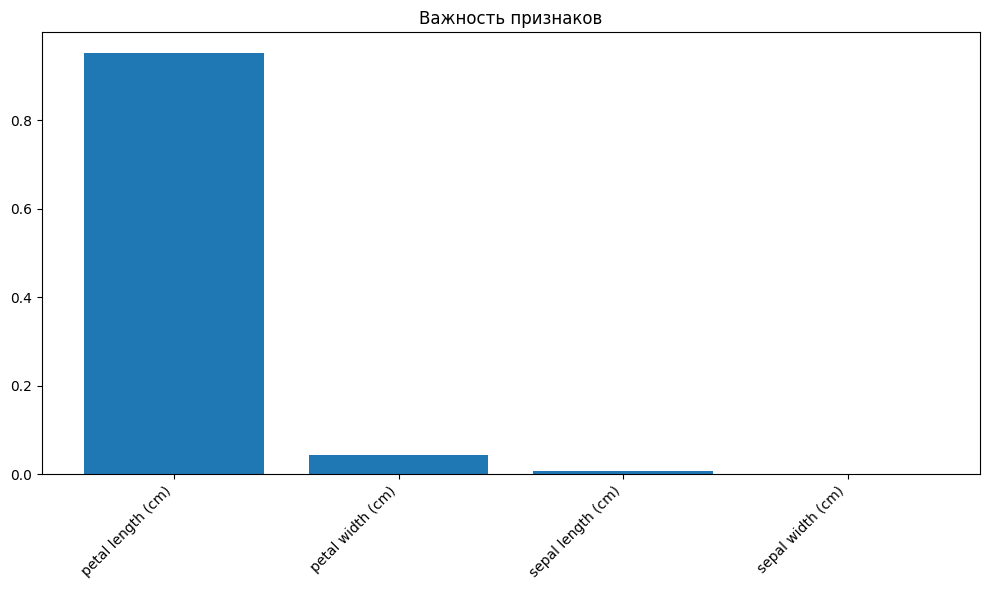

In [61]:
# ваш код

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")

for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Важность признаков")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i]
           for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### <font color='#11a642' size='4'> Нарисуйте дерево с оптимальными гиперпараметрами


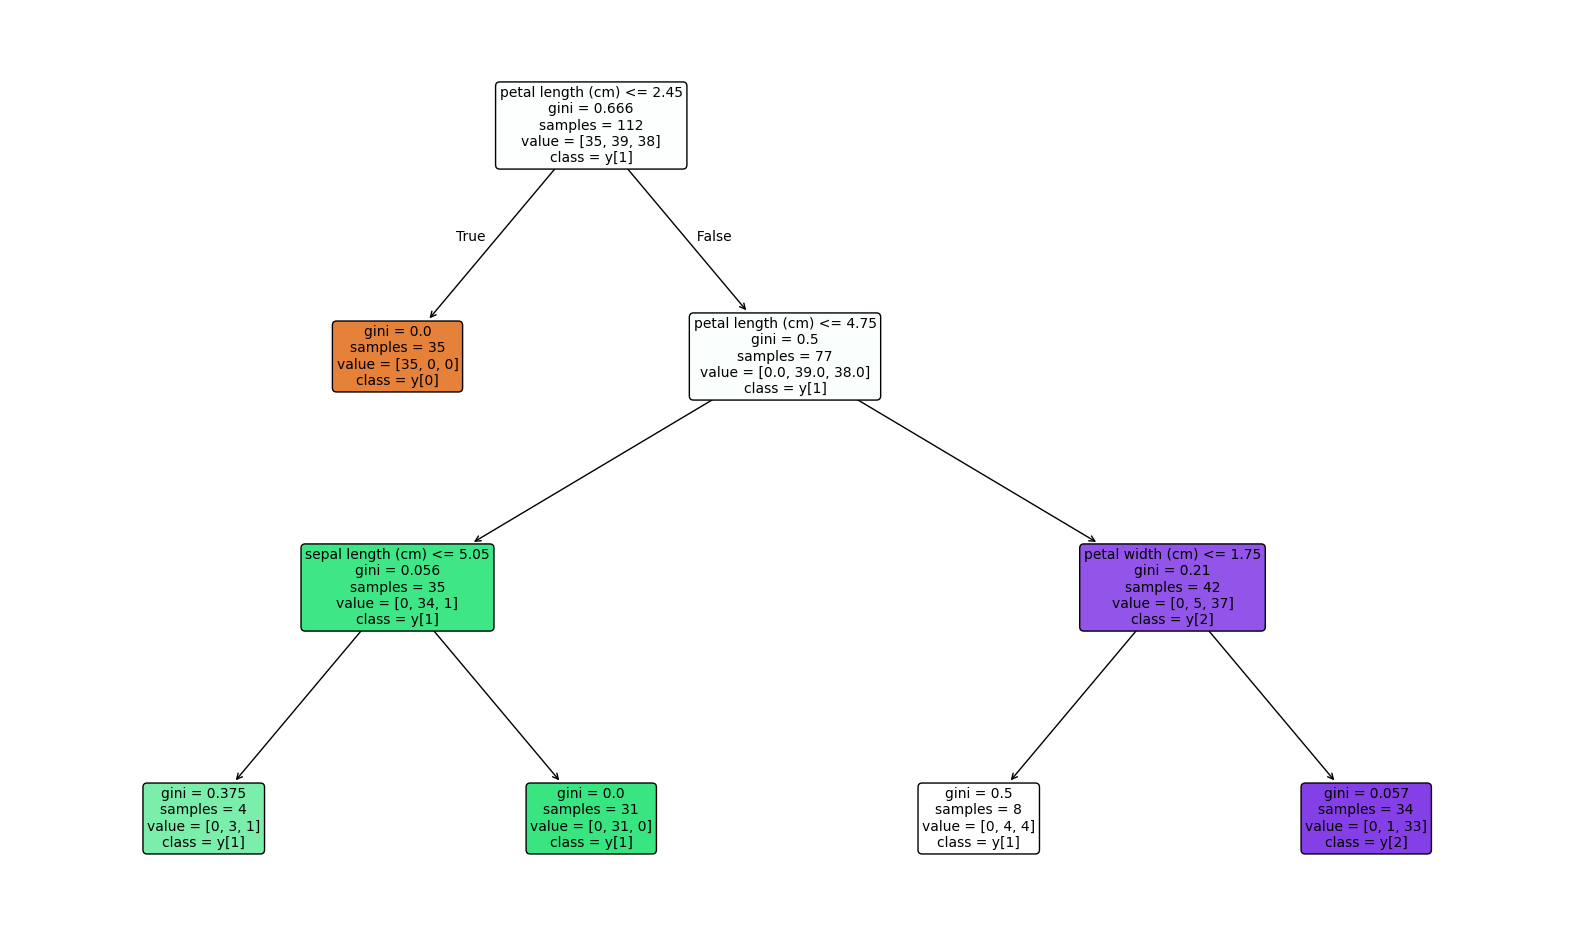

In [62]:
# ваш код

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(best_tree,
          feature_names=feature_names,
          class_names=True,  # если классификация, иначе убрать
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

### <font color='#11a642' size='4'> Ваши выводы
